In [1]:
import json
import os
import math
import librosa

In [10]:
DATASET_PATH = "dataset"
JSON_PATH = "data_10.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

In [13]:
def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs from music dataset and saves them into a json file along witgh genre labels.
        :param dataset_path (str): Path to dataset
        :param json_path (str): Path to json file used to save MFCCs
        :param num_mfcc (int): Number of coefficients to extract
        :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        :param hop_length (int): Sliding window for FFT. Measured in # of samples
        :param: num_segments (int): Number of segments we want to divide sample tracks into
        :return:
        """
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        if dirpath is not dataset_path:
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))
            for f in filenames:
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
                for d in range(num_segments):
                    start = samples_per_segment * d
                    finish = start + samples_per_segment
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

In [15]:
if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)


Processing: dataset\blues
dataset\blues\blues.00000.wav, segment:1
dataset\blues\blues.00000.wav, segment:2
dataset\blues\blues.00000.wav, segment:3
dataset\blues\blues.00000.wav, segment:4
dataset\blues\blues.00000.wav, segment:5
dataset\blues\blues.00000.wav, segment:6
dataset\blues\blues.00000.wav, segment:7
dataset\blues\blues.00000.wav, segment:8
dataset\blues\blues.00000.wav, segment:9
dataset\blues\blues.00000.wav, segment:10
dataset\blues\blues.00001.wav, segment:1
dataset\blues\blues.00001.wav, segment:2
dataset\blues\blues.00001.wav, segment:3
dataset\blues\blues.00001.wav, segment:4
dataset\blues\blues.00001.wav, segment:5
dataset\blues\blues.00001.wav, segment:6
dataset\blues\blues.00001.wav, segment:7
dataset\blues\blues.00001.wav, segment:8
dataset\blues\blues.00001.wav, segment:9
dataset\blues\blues.00001.wav, segment:10
dataset\blues\blues.00002.wav, segment:1
dataset\blues\blues.00002.wav, segment:2
dataset\blues\blues.00002.wav, segment:3
dataset\blues\blues.00002.wa

dataset\blues\blues.00021.wav, segment:1
dataset\blues\blues.00021.wav, segment:2
dataset\blues\blues.00021.wav, segment:3
dataset\blues\blues.00021.wav, segment:4
dataset\blues\blues.00021.wav, segment:5
dataset\blues\blues.00021.wav, segment:6
dataset\blues\blues.00021.wav, segment:7
dataset\blues\blues.00021.wav, segment:8
dataset\blues\blues.00021.wav, segment:9
dataset\blues\blues.00021.wav, segment:10
dataset\blues\blues.00022.wav, segment:1
dataset\blues\blues.00022.wav, segment:2
dataset\blues\blues.00022.wav, segment:3
dataset\blues\blues.00022.wav, segment:4
dataset\blues\blues.00022.wav, segment:5
dataset\blues\blues.00022.wav, segment:6
dataset\blues\blues.00022.wav, segment:7
dataset\blues\blues.00022.wav, segment:8
dataset\blues\blues.00022.wav, segment:9
dataset\blues\blues.00022.wav, segment:10
dataset\blues\blues.00023.wav, segment:1
dataset\blues\blues.00023.wav, segment:2
dataset\blues\blues.00023.wav, segment:3
dataset\blues\blues.00023.wav, segment:4
dataset\blues\

dataset\blues\blues.00042.wav, segment:1
dataset\blues\blues.00042.wav, segment:2
dataset\blues\blues.00042.wav, segment:3
dataset\blues\blues.00042.wav, segment:4
dataset\blues\blues.00042.wav, segment:5
dataset\blues\blues.00042.wav, segment:6
dataset\blues\blues.00042.wav, segment:7
dataset\blues\blues.00042.wav, segment:8
dataset\blues\blues.00042.wav, segment:9
dataset\blues\blues.00042.wav, segment:10
dataset\blues\blues.00043.wav, segment:1
dataset\blues\blues.00043.wav, segment:2
dataset\blues\blues.00043.wav, segment:3
dataset\blues\blues.00043.wav, segment:4
dataset\blues\blues.00043.wav, segment:5
dataset\blues\blues.00043.wav, segment:6
dataset\blues\blues.00043.wav, segment:7
dataset\blues\blues.00043.wav, segment:8
dataset\blues\blues.00043.wav, segment:9
dataset\blues\blues.00043.wav, segment:10
dataset\blues\blues.00044.wav, segment:1
dataset\blues\blues.00044.wav, segment:2
dataset\blues\blues.00044.wav, segment:3
dataset\blues\blues.00044.wav, segment:4
dataset\blues\

dataset\blues\blues.00063.wav, segment:9
dataset\blues\blues.00063.wav, segment:10
dataset\blues\blues.00064.wav, segment:1
dataset\blues\blues.00064.wav, segment:2
dataset\blues\blues.00064.wav, segment:3
dataset\blues\blues.00064.wav, segment:4
dataset\blues\blues.00064.wav, segment:5
dataset\blues\blues.00064.wav, segment:6
dataset\blues\blues.00064.wav, segment:7
dataset\blues\blues.00064.wav, segment:8
dataset\blues\blues.00064.wav, segment:9
dataset\blues\blues.00064.wav, segment:10
dataset\blues\blues.00065.wav, segment:1
dataset\blues\blues.00065.wav, segment:2
dataset\blues\blues.00065.wav, segment:3
dataset\blues\blues.00065.wav, segment:4
dataset\blues\blues.00065.wav, segment:5
dataset\blues\blues.00065.wav, segment:6
dataset\blues\blues.00065.wav, segment:7
dataset\blues\blues.00065.wav, segment:8
dataset\blues\blues.00065.wav, segment:9
dataset\blues\blues.00065.wav, segment:10
dataset\blues\blues.00066.wav, segment:1
dataset\blues\blues.00066.wav, segment:2
dataset\blues

dataset\blues\blues.00085.wav, segment:1
dataset\blues\blues.00085.wav, segment:2
dataset\blues\blues.00085.wav, segment:3
dataset\blues\blues.00085.wav, segment:4
dataset\blues\blues.00085.wav, segment:5
dataset\blues\blues.00085.wav, segment:6
dataset\blues\blues.00085.wav, segment:7
dataset\blues\blues.00085.wav, segment:8
dataset\blues\blues.00085.wav, segment:9
dataset\blues\blues.00085.wav, segment:10
dataset\blues\blues.00086.wav, segment:1
dataset\blues\blues.00086.wav, segment:2
dataset\blues\blues.00086.wav, segment:3
dataset\blues\blues.00086.wav, segment:4
dataset\blues\blues.00086.wav, segment:5
dataset\blues\blues.00086.wav, segment:6
dataset\blues\blues.00086.wav, segment:7
dataset\blues\blues.00086.wav, segment:8
dataset\blues\blues.00086.wav, segment:9
dataset\blues\blues.00086.wav, segment:10
dataset\blues\blues.00087.wav, segment:1
dataset\blues\blues.00087.wav, segment:2
dataset\blues\blues.00087.wav, segment:3
dataset\blues\blues.00087.wav, segment:4
dataset\blues\

dataset\classical\classical.00004.wav, segment:7
dataset\classical\classical.00004.wav, segment:8
dataset\classical\classical.00004.wav, segment:9
dataset\classical\classical.00004.wav, segment:10
dataset\classical\classical.00005.wav, segment:1
dataset\classical\classical.00005.wav, segment:2
dataset\classical\classical.00005.wav, segment:3
dataset\classical\classical.00005.wav, segment:4
dataset\classical\classical.00005.wav, segment:5
dataset\classical\classical.00005.wav, segment:6
dataset\classical\classical.00005.wav, segment:7
dataset\classical\classical.00005.wav, segment:8
dataset\classical\classical.00005.wav, segment:9
dataset\classical\classical.00005.wav, segment:10
dataset\classical\classical.00006.wav, segment:1
dataset\classical\classical.00006.wav, segment:2
dataset\classical\classical.00006.wav, segment:3
dataset\classical\classical.00006.wav, segment:4
dataset\classical\classical.00006.wav, segment:5
dataset\classical\classical.00006.wav, segment:6
dataset\classical\

dataset\classical\classical.00021.wav, segment:8
dataset\classical\classical.00021.wav, segment:9
dataset\classical\classical.00021.wav, segment:10
dataset\classical\classical.00022.wav, segment:1
dataset\classical\classical.00022.wav, segment:2
dataset\classical\classical.00022.wav, segment:3
dataset\classical\classical.00022.wav, segment:4
dataset\classical\classical.00022.wav, segment:5
dataset\classical\classical.00022.wav, segment:6
dataset\classical\classical.00022.wav, segment:7
dataset\classical\classical.00022.wav, segment:8
dataset\classical\classical.00022.wav, segment:9
dataset\classical\classical.00022.wav, segment:10
dataset\classical\classical.00023.wav, segment:1
dataset\classical\classical.00023.wav, segment:2
dataset\classical\classical.00023.wav, segment:3
dataset\classical\classical.00023.wav, segment:4
dataset\classical\classical.00023.wav, segment:5
dataset\classical\classical.00023.wav, segment:6
dataset\classical\classical.00023.wav, segment:7
dataset\classical\

dataset\classical\classical.00038.wav, segment:6
dataset\classical\classical.00038.wav, segment:7
dataset\classical\classical.00038.wav, segment:8
dataset\classical\classical.00038.wav, segment:9
dataset\classical\classical.00038.wav, segment:10
dataset\classical\classical.00039.wav, segment:1
dataset\classical\classical.00039.wav, segment:2
dataset\classical\classical.00039.wav, segment:3
dataset\classical\classical.00039.wav, segment:4
dataset\classical\classical.00039.wav, segment:5
dataset\classical\classical.00039.wav, segment:6
dataset\classical\classical.00039.wav, segment:7
dataset\classical\classical.00039.wav, segment:8
dataset\classical\classical.00039.wav, segment:9
dataset\classical\classical.00039.wav, segment:10
dataset\classical\classical.00040.wav, segment:1
dataset\classical\classical.00040.wav, segment:2
dataset\classical\classical.00040.wav, segment:3
dataset\classical\classical.00040.wav, segment:4
dataset\classical\classical.00040.wav, segment:5
dataset\classical\

dataset\classical\classical.00057.wav, segment:4
dataset\classical\classical.00057.wav, segment:5
dataset\classical\classical.00057.wav, segment:6
dataset\classical\classical.00057.wav, segment:7
dataset\classical\classical.00057.wav, segment:8
dataset\classical\classical.00057.wav, segment:9
dataset\classical\classical.00057.wav, segment:10
dataset\classical\classical.00058.wav, segment:1
dataset\classical\classical.00058.wav, segment:2
dataset\classical\classical.00058.wav, segment:3
dataset\classical\classical.00058.wav, segment:4
dataset\classical\classical.00058.wav, segment:5
dataset\classical\classical.00058.wav, segment:6
dataset\classical\classical.00058.wav, segment:7
dataset\classical\classical.00058.wav, segment:8
dataset\classical\classical.00058.wav, segment:9
dataset\classical\classical.00058.wav, segment:10
dataset\classical\classical.00059.wav, segment:1
dataset\classical\classical.00059.wav, segment:2
dataset\classical\classical.00059.wav, segment:3
dataset\classical\

dataset\classical\classical.00075.wav, segment:8
dataset\classical\classical.00075.wav, segment:9
dataset\classical\classical.00075.wav, segment:10
dataset\classical\classical.00076.wav, segment:1
dataset\classical\classical.00076.wav, segment:2
dataset\classical\classical.00076.wav, segment:3
dataset\classical\classical.00076.wav, segment:4
dataset\classical\classical.00076.wav, segment:5
dataset\classical\classical.00076.wav, segment:6
dataset\classical\classical.00076.wav, segment:7
dataset\classical\classical.00076.wav, segment:8
dataset\classical\classical.00076.wav, segment:9
dataset\classical\classical.00076.wav, segment:10
dataset\classical\classical.00077.wav, segment:1
dataset\classical\classical.00077.wav, segment:2
dataset\classical\classical.00077.wav, segment:3
dataset\classical\classical.00077.wav, segment:4
dataset\classical\classical.00077.wav, segment:5
dataset\classical\classical.00077.wav, segment:6
dataset\classical\classical.00077.wav, segment:7
dataset\classical\

dataset\classical\classical.00093.wav, segment:7
dataset\classical\classical.00093.wav, segment:8
dataset\classical\classical.00093.wav, segment:9
dataset\classical\classical.00093.wav, segment:10
dataset\classical\classical.00094.wav, segment:1
dataset\classical\classical.00094.wav, segment:2
dataset\classical\classical.00094.wav, segment:3
dataset\classical\classical.00094.wav, segment:4
dataset\classical\classical.00094.wav, segment:5
dataset\classical\classical.00094.wav, segment:6
dataset\classical\classical.00094.wav, segment:7
dataset\classical\classical.00094.wav, segment:8
dataset\classical\classical.00094.wav, segment:9
dataset\classical\classical.00094.wav, segment:10
dataset\classical\classical.00095.wav, segment:1
dataset\classical\classical.00095.wav, segment:2
dataset\classical\classical.00095.wav, segment:3
dataset\classical\classical.00095.wav, segment:4
dataset\classical\classical.00095.wav, segment:5
dataset\classical\classical.00095.wav, segment:6
dataset\classical\

dataset\country\country.00012.wav, segment:6
dataset\country\country.00012.wav, segment:7
dataset\country\country.00012.wav, segment:8
dataset\country\country.00012.wav, segment:9
dataset\country\country.00012.wav, segment:10
dataset\country\country.00013.wav, segment:1
dataset\country\country.00013.wav, segment:2
dataset\country\country.00013.wav, segment:3
dataset\country\country.00013.wav, segment:4
dataset\country\country.00013.wav, segment:5
dataset\country\country.00013.wav, segment:6
dataset\country\country.00013.wav, segment:7
dataset\country\country.00013.wav, segment:8
dataset\country\country.00013.wav, segment:9
dataset\country\country.00013.wav, segment:10
dataset\country\country.00014.wav, segment:1
dataset\country\country.00014.wav, segment:2
dataset\country\country.00014.wav, segment:3
dataset\country\country.00014.wav, segment:4
dataset\country\country.00014.wav, segment:5
dataset\country\country.00014.wav, segment:6
dataset\country\country.00014.wav, segment:7
dataset\

dataset\country\country.00032.wav, segment:8
dataset\country\country.00032.wav, segment:9
dataset\country\country.00032.wav, segment:10
dataset\country\country.00033.wav, segment:1
dataset\country\country.00033.wav, segment:2
dataset\country\country.00033.wav, segment:3
dataset\country\country.00033.wav, segment:4
dataset\country\country.00033.wav, segment:5
dataset\country\country.00033.wav, segment:6
dataset\country\country.00033.wav, segment:7
dataset\country\country.00033.wav, segment:8
dataset\country\country.00033.wav, segment:9
dataset\country\country.00033.wav, segment:10
dataset\country\country.00034.wav, segment:1
dataset\country\country.00034.wav, segment:2
dataset\country\country.00034.wav, segment:3
dataset\country\country.00034.wav, segment:4
dataset\country\country.00034.wav, segment:5
dataset\country\country.00034.wav, segment:6
dataset\country\country.00034.wav, segment:7
dataset\country\country.00034.wav, segment:8
dataset\country\country.00034.wav, segment:9
dataset\

dataset\country\country.00052.wav, segment:5
dataset\country\country.00052.wav, segment:6
dataset\country\country.00052.wav, segment:7
dataset\country\country.00052.wav, segment:8
dataset\country\country.00052.wav, segment:9
dataset\country\country.00052.wav, segment:10
dataset\country\country.00053.wav, segment:1
dataset\country\country.00053.wav, segment:2
dataset\country\country.00053.wav, segment:3
dataset\country\country.00053.wav, segment:4
dataset\country\country.00053.wav, segment:5
dataset\country\country.00053.wav, segment:6
dataset\country\country.00053.wav, segment:7
dataset\country\country.00053.wav, segment:8
dataset\country\country.00053.wav, segment:9
dataset\country\country.00053.wav, segment:10
dataset\country\country.00054.wav, segment:1
dataset\country\country.00054.wav, segment:2
dataset\country\country.00054.wav, segment:3
dataset\country\country.00054.wav, segment:4
dataset\country\country.00054.wav, segment:5
dataset\country\country.00054.wav, segment:6
dataset\

dataset\country\country.00070.wav, segment:7
dataset\country\country.00070.wav, segment:8
dataset\country\country.00070.wav, segment:9
dataset\country\country.00070.wav, segment:10
dataset\country\country.00071.wav, segment:1
dataset\country\country.00071.wav, segment:2
dataset\country\country.00071.wav, segment:3
dataset\country\country.00071.wav, segment:4
dataset\country\country.00071.wav, segment:5
dataset\country\country.00071.wav, segment:6
dataset\country\country.00071.wav, segment:7
dataset\country\country.00071.wav, segment:8
dataset\country\country.00071.wav, segment:9
dataset\country\country.00071.wav, segment:10
dataset\country\country.00072.wav, segment:1
dataset\country\country.00072.wav, segment:2
dataset\country\country.00072.wav, segment:3
dataset\country\country.00072.wav, segment:4
dataset\country\country.00072.wav, segment:5
dataset\country\country.00072.wav, segment:6
dataset\country\country.00072.wav, segment:7
dataset\country\country.00072.wav, segment:8
dataset\

dataset\country\country.00090.wav, segment:9
dataset\country\country.00090.wav, segment:10
dataset\country\country.00091.wav, segment:1
dataset\country\country.00091.wav, segment:2
dataset\country\country.00091.wav, segment:3
dataset\country\country.00091.wav, segment:4
dataset\country\country.00091.wav, segment:5
dataset\country\country.00091.wav, segment:6
dataset\country\country.00091.wav, segment:7
dataset\country\country.00091.wav, segment:8
dataset\country\country.00091.wav, segment:9
dataset\country\country.00091.wav, segment:10
dataset\country\country.00092.wav, segment:1
dataset\country\country.00092.wav, segment:2
dataset\country\country.00092.wav, segment:3
dataset\country\country.00092.wav, segment:4
dataset\country\country.00092.wav, segment:5
dataset\country\country.00092.wav, segment:6
dataset\country\country.00092.wav, segment:7
dataset\country\country.00092.wav, segment:8
dataset\country\country.00092.wav, segment:9
dataset\country\country.00092.wav, segment:10
dataset

dataset\disco\disco.00010.wav, segment:5
dataset\disco\disco.00010.wav, segment:6
dataset\disco\disco.00010.wav, segment:7
dataset\disco\disco.00010.wav, segment:8
dataset\disco\disco.00010.wav, segment:9
dataset\disco\disco.00010.wav, segment:10
dataset\disco\disco.00011.wav, segment:1
dataset\disco\disco.00011.wav, segment:2
dataset\disco\disco.00011.wav, segment:3
dataset\disco\disco.00011.wav, segment:4
dataset\disco\disco.00011.wav, segment:5
dataset\disco\disco.00011.wav, segment:6
dataset\disco\disco.00011.wav, segment:7
dataset\disco\disco.00011.wav, segment:8
dataset\disco\disco.00011.wav, segment:9
dataset\disco\disco.00011.wav, segment:10
dataset\disco\disco.00012.wav, segment:1
dataset\disco\disco.00012.wav, segment:2
dataset\disco\disco.00012.wav, segment:3
dataset\disco\disco.00012.wav, segment:4
dataset\disco\disco.00012.wav, segment:5
dataset\disco\disco.00012.wav, segment:6
dataset\disco\disco.00012.wav, segment:7
dataset\disco\disco.00012.wav, segment:8
dataset\disco\

dataset\disco\disco.00032.wav, segment:2
dataset\disco\disco.00032.wav, segment:3
dataset\disco\disco.00032.wav, segment:4
dataset\disco\disco.00032.wav, segment:5
dataset\disco\disco.00032.wav, segment:6
dataset\disco\disco.00032.wav, segment:7
dataset\disco\disco.00032.wav, segment:8
dataset\disco\disco.00032.wav, segment:9
dataset\disco\disco.00032.wav, segment:10
dataset\disco\disco.00033.wav, segment:1
dataset\disco\disco.00033.wav, segment:2
dataset\disco\disco.00033.wav, segment:3
dataset\disco\disco.00033.wav, segment:4
dataset\disco\disco.00033.wav, segment:5
dataset\disco\disco.00033.wav, segment:6
dataset\disco\disco.00033.wav, segment:7
dataset\disco\disco.00033.wav, segment:8
dataset\disco\disco.00033.wav, segment:9
dataset\disco\disco.00033.wav, segment:10
dataset\disco\disco.00034.wav, segment:1
dataset\disco\disco.00034.wav, segment:2
dataset\disco\disco.00034.wav, segment:3
dataset\disco\disco.00034.wav, segment:4
dataset\disco\disco.00034.wav, segment:5
dataset\disco\

dataset\disco\disco.00052.wav, segment:9
dataset\disco\disco.00052.wav, segment:10
dataset\disco\disco.00053.wav, segment:1
dataset\disco\disco.00053.wav, segment:2
dataset\disco\disco.00053.wav, segment:3
dataset\disco\disco.00053.wav, segment:4
dataset\disco\disco.00053.wav, segment:5
dataset\disco\disco.00053.wav, segment:6
dataset\disco\disco.00053.wav, segment:7
dataset\disco\disco.00053.wav, segment:8
dataset\disco\disco.00053.wav, segment:9
dataset\disco\disco.00053.wav, segment:10
dataset\disco\disco.00054.wav, segment:1
dataset\disco\disco.00054.wav, segment:2
dataset\disco\disco.00054.wav, segment:3
dataset\disco\disco.00054.wav, segment:4
dataset\disco\disco.00054.wav, segment:5
dataset\disco\disco.00054.wav, segment:6
dataset\disco\disco.00054.wav, segment:7
dataset\disco\disco.00054.wav, segment:8
dataset\disco\disco.00054.wav, segment:9
dataset\disco\disco.00054.wav, segment:10
dataset\disco\disco.00055.wav, segment:1
dataset\disco\disco.00055.wav, segment:2
dataset\disco

dataset\disco\disco.00075.wav, segment:1
dataset\disco\disco.00075.wav, segment:2
dataset\disco\disco.00075.wav, segment:3
dataset\disco\disco.00075.wav, segment:4
dataset\disco\disco.00075.wav, segment:5
dataset\disco\disco.00075.wav, segment:6
dataset\disco\disco.00075.wav, segment:7
dataset\disco\disco.00075.wav, segment:8
dataset\disco\disco.00075.wav, segment:9
dataset\disco\disco.00075.wav, segment:10
dataset\disco\disco.00076.wav, segment:1
dataset\disco\disco.00076.wav, segment:2
dataset\disco\disco.00076.wav, segment:3
dataset\disco\disco.00076.wav, segment:4
dataset\disco\disco.00076.wav, segment:5
dataset\disco\disco.00076.wav, segment:6
dataset\disco\disco.00076.wav, segment:7
dataset\disco\disco.00076.wav, segment:8
dataset\disco\disco.00076.wav, segment:9
dataset\disco\disco.00076.wav, segment:10
dataset\disco\disco.00077.wav, segment:1
dataset\disco\disco.00077.wav, segment:2
dataset\disco\disco.00077.wav, segment:3
dataset\disco\disco.00077.wav, segment:4
dataset\disco\

dataset\disco\disco.00095.wav, segment:8
dataset\disco\disco.00095.wav, segment:9
dataset\disco\disco.00095.wav, segment:10
dataset\disco\disco.00096.wav, segment:1
dataset\disco\disco.00096.wav, segment:2
dataset\disco\disco.00096.wav, segment:3
dataset\disco\disco.00096.wav, segment:4
dataset\disco\disco.00096.wav, segment:5
dataset\disco\disco.00096.wav, segment:6
dataset\disco\disco.00096.wav, segment:7
dataset\disco\disco.00096.wav, segment:8
dataset\disco\disco.00096.wav, segment:9
dataset\disco\disco.00096.wav, segment:10
dataset\disco\disco.00097.wav, segment:1
dataset\disco\disco.00097.wav, segment:2
dataset\disco\disco.00097.wav, segment:3
dataset\disco\disco.00097.wav, segment:4
dataset\disco\disco.00097.wav, segment:5
dataset\disco\disco.00097.wav, segment:6
dataset\disco\disco.00097.wav, segment:7
dataset\disco\disco.00097.wav, segment:8
dataset\disco\disco.00097.wav, segment:9
dataset\disco\disco.00097.wav, segment:10
dataset\disco\disco.00098.wav, segment:1
dataset\disco

dataset\hiphop\hiphop.00015.wav, segment:6
dataset\hiphop\hiphop.00015.wav, segment:7
dataset\hiphop\hiphop.00015.wav, segment:8
dataset\hiphop\hiphop.00015.wav, segment:9
dataset\hiphop\hiphop.00015.wav, segment:10
dataset\hiphop\hiphop.00016.wav, segment:1
dataset\hiphop\hiphop.00016.wav, segment:2
dataset\hiphop\hiphop.00016.wav, segment:3
dataset\hiphop\hiphop.00016.wav, segment:4
dataset\hiphop\hiphop.00016.wav, segment:5
dataset\hiphop\hiphop.00016.wav, segment:6
dataset\hiphop\hiphop.00016.wav, segment:7
dataset\hiphop\hiphop.00016.wav, segment:8
dataset\hiphop\hiphop.00016.wav, segment:9
dataset\hiphop\hiphop.00016.wav, segment:10
dataset\hiphop\hiphop.00017.wav, segment:1
dataset\hiphop\hiphop.00017.wav, segment:2
dataset\hiphop\hiphop.00017.wav, segment:3
dataset\hiphop\hiphop.00017.wav, segment:4
dataset\hiphop\hiphop.00017.wav, segment:5
dataset\hiphop\hiphop.00017.wav, segment:6
dataset\hiphop\hiphop.00017.wav, segment:7
dataset\hiphop\hiphop.00017.wav, segment:8
dataset\h

dataset\hiphop\hiphop.00034.wav, segment:8
dataset\hiphop\hiphop.00034.wav, segment:9
dataset\hiphop\hiphop.00034.wav, segment:10
dataset\hiphop\hiphop.00035.wav, segment:1
dataset\hiphop\hiphop.00035.wav, segment:2
dataset\hiphop\hiphop.00035.wav, segment:3
dataset\hiphop\hiphop.00035.wav, segment:4
dataset\hiphop\hiphop.00035.wav, segment:5
dataset\hiphop\hiphop.00035.wav, segment:6
dataset\hiphop\hiphop.00035.wav, segment:7
dataset\hiphop\hiphop.00035.wav, segment:8
dataset\hiphop\hiphop.00035.wav, segment:9
dataset\hiphop\hiphop.00035.wav, segment:10
dataset\hiphop\hiphop.00036.wav, segment:1
dataset\hiphop\hiphop.00036.wav, segment:2
dataset\hiphop\hiphop.00036.wav, segment:3
dataset\hiphop\hiphop.00036.wav, segment:4
dataset\hiphop\hiphop.00036.wav, segment:5
dataset\hiphop\hiphop.00036.wav, segment:6
dataset\hiphop\hiphop.00036.wav, segment:7
dataset\hiphop\hiphop.00036.wav, segment:8
dataset\hiphop\hiphop.00036.wav, segment:9
dataset\hiphop\hiphop.00036.wav, segment:10
dataset\

dataset\hiphop\hiphop.00055.wav, segment:8
dataset\hiphop\hiphop.00055.wav, segment:9
dataset\hiphop\hiphop.00055.wav, segment:10
dataset\hiphop\hiphop.00056.wav, segment:1
dataset\hiphop\hiphop.00056.wav, segment:2
dataset\hiphop\hiphop.00056.wav, segment:3
dataset\hiphop\hiphop.00056.wav, segment:4
dataset\hiphop\hiphop.00056.wav, segment:5
dataset\hiphop\hiphop.00056.wav, segment:6
dataset\hiphop\hiphop.00056.wav, segment:7
dataset\hiphop\hiphop.00056.wav, segment:8
dataset\hiphop\hiphop.00056.wav, segment:9
dataset\hiphop\hiphop.00056.wav, segment:10
dataset\hiphop\hiphop.00057.wav, segment:1
dataset\hiphop\hiphop.00057.wav, segment:2
dataset\hiphop\hiphop.00057.wav, segment:3
dataset\hiphop\hiphop.00057.wav, segment:4
dataset\hiphop\hiphop.00057.wav, segment:5
dataset\hiphop\hiphop.00057.wav, segment:6
dataset\hiphop\hiphop.00057.wav, segment:7
dataset\hiphop\hiphop.00057.wav, segment:8
dataset\hiphop\hiphop.00057.wav, segment:9
dataset\hiphop\hiphop.00057.wav, segment:10
dataset\

dataset\hiphop\hiphop.00075.wav, segment:4
dataset\hiphop\hiphop.00075.wav, segment:5
dataset\hiphop\hiphop.00075.wav, segment:6
dataset\hiphop\hiphop.00075.wav, segment:7
dataset\hiphop\hiphop.00075.wav, segment:8
dataset\hiphop\hiphop.00075.wav, segment:9
dataset\hiphop\hiphop.00075.wav, segment:10
dataset\hiphop\hiphop.00076.wav, segment:1
dataset\hiphop\hiphop.00076.wav, segment:2
dataset\hiphop\hiphop.00076.wav, segment:3
dataset\hiphop\hiphop.00076.wav, segment:4
dataset\hiphop\hiphop.00076.wav, segment:5
dataset\hiphop\hiphop.00076.wav, segment:6
dataset\hiphop\hiphop.00076.wav, segment:7
dataset\hiphop\hiphop.00076.wav, segment:8
dataset\hiphop\hiphop.00076.wav, segment:9
dataset\hiphop\hiphop.00076.wav, segment:10
dataset\hiphop\hiphop.00077.wav, segment:1
dataset\hiphop\hiphop.00077.wav, segment:2
dataset\hiphop\hiphop.00077.wav, segment:3
dataset\hiphop\hiphop.00077.wav, segment:4
dataset\hiphop\hiphop.00077.wav, segment:5
dataset\hiphop\hiphop.00077.wav, segment:6
dataset\h

dataset\hiphop\hiphop.00094.wav, segment:8
dataset\hiphop\hiphop.00094.wav, segment:9
dataset\hiphop\hiphop.00094.wav, segment:10
dataset\hiphop\hiphop.00095.wav, segment:1
dataset\hiphop\hiphop.00095.wav, segment:2
dataset\hiphop\hiphop.00095.wav, segment:3
dataset\hiphop\hiphop.00095.wav, segment:4
dataset\hiphop\hiphop.00095.wav, segment:5
dataset\hiphop\hiphop.00095.wav, segment:6
dataset\hiphop\hiphop.00095.wav, segment:7
dataset\hiphop\hiphop.00095.wav, segment:8
dataset\hiphop\hiphop.00095.wav, segment:9
dataset\hiphop\hiphop.00095.wav, segment:10
dataset\hiphop\hiphop.00096.wav, segment:1
dataset\hiphop\hiphop.00096.wav, segment:2
dataset\hiphop\hiphop.00096.wav, segment:3
dataset\hiphop\hiphop.00096.wav, segment:4
dataset\hiphop\hiphop.00096.wav, segment:5
dataset\hiphop\hiphop.00096.wav, segment:6
dataset\hiphop\hiphop.00096.wav, segment:7
dataset\hiphop\hiphop.00096.wav, segment:8
dataset\hiphop\hiphop.00096.wav, segment:9
dataset\hiphop\hiphop.00096.wav, segment:10
dataset\

dataset\jazz\jazz.00016.wav, segment:8
dataset\jazz\jazz.00016.wav, segment:9
dataset\jazz\jazz.00016.wav, segment:10
dataset\jazz\jazz.00017.wav, segment:1
dataset\jazz\jazz.00017.wav, segment:2
dataset\jazz\jazz.00017.wav, segment:3
dataset\jazz\jazz.00017.wav, segment:4
dataset\jazz\jazz.00017.wav, segment:5
dataset\jazz\jazz.00017.wav, segment:6
dataset\jazz\jazz.00017.wav, segment:7
dataset\jazz\jazz.00017.wav, segment:8
dataset\jazz\jazz.00017.wav, segment:9
dataset\jazz\jazz.00017.wav, segment:10
dataset\jazz\jazz.00018.wav, segment:1
dataset\jazz\jazz.00018.wav, segment:2
dataset\jazz\jazz.00018.wav, segment:3
dataset\jazz\jazz.00018.wav, segment:4
dataset\jazz\jazz.00018.wav, segment:5
dataset\jazz\jazz.00018.wav, segment:6
dataset\jazz\jazz.00018.wav, segment:7
dataset\jazz\jazz.00018.wav, segment:8
dataset\jazz\jazz.00018.wav, segment:9
dataset\jazz\jazz.00018.wav, segment:10
dataset\jazz\jazz.00019.wav, segment:1
dataset\jazz\jazz.00019.wav, segment:2
dataset\jazz\jazz.0001

dataset\jazz\jazz.00038.wav, segment:9
dataset\jazz\jazz.00038.wav, segment:10
dataset\jazz\jazz.00039.wav, segment:1
dataset\jazz\jazz.00039.wav, segment:2
dataset\jazz\jazz.00039.wav, segment:3
dataset\jazz\jazz.00039.wav, segment:4
dataset\jazz\jazz.00039.wav, segment:5
dataset\jazz\jazz.00039.wav, segment:6
dataset\jazz\jazz.00039.wav, segment:7
dataset\jazz\jazz.00039.wav, segment:8
dataset\jazz\jazz.00039.wav, segment:9
dataset\jazz\jazz.00039.wav, segment:10
dataset\jazz\jazz.00040.wav, segment:1
dataset\jazz\jazz.00040.wav, segment:2
dataset\jazz\jazz.00040.wav, segment:3
dataset\jazz\jazz.00040.wav, segment:4
dataset\jazz\jazz.00040.wav, segment:5
dataset\jazz\jazz.00040.wav, segment:6
dataset\jazz\jazz.00040.wav, segment:7
dataset\jazz\jazz.00040.wav, segment:8
dataset\jazz\jazz.00040.wav, segment:9
dataset\jazz\jazz.00040.wav, segment:10
dataset\jazz\jazz.00041.wav, segment:1
dataset\jazz\jazz.00041.wav, segment:2
dataset\jazz\jazz.00041.wav, segment:3
dataset\jazz\jazz.0004

dataset\jazz\jazz.00062.wav, segment:1
dataset\jazz\jazz.00062.wav, segment:2
dataset\jazz\jazz.00062.wav, segment:3
dataset\jazz\jazz.00062.wav, segment:4
dataset\jazz\jazz.00062.wav, segment:5
dataset\jazz\jazz.00062.wav, segment:6
dataset\jazz\jazz.00062.wav, segment:7
dataset\jazz\jazz.00062.wav, segment:8
dataset\jazz\jazz.00062.wav, segment:9
dataset\jazz\jazz.00062.wav, segment:10
dataset\jazz\jazz.00063.wav, segment:1
dataset\jazz\jazz.00063.wav, segment:2
dataset\jazz\jazz.00063.wav, segment:3
dataset\jazz\jazz.00063.wav, segment:4
dataset\jazz\jazz.00063.wav, segment:5
dataset\jazz\jazz.00063.wav, segment:6
dataset\jazz\jazz.00063.wav, segment:7
dataset\jazz\jazz.00063.wav, segment:8
dataset\jazz\jazz.00063.wav, segment:9
dataset\jazz\jazz.00063.wav, segment:10
dataset\jazz\jazz.00064.wav, segment:1
dataset\jazz\jazz.00064.wav, segment:2
dataset\jazz\jazz.00064.wav, segment:3
dataset\jazz\jazz.00064.wav, segment:4
dataset\jazz\jazz.00064.wav, segment:5
dataset\jazz\jazz.00064

dataset\jazz\jazz.00083.wav, segment:4
dataset\jazz\jazz.00083.wav, segment:5
dataset\jazz\jazz.00083.wav, segment:6
dataset\jazz\jazz.00083.wav, segment:7
dataset\jazz\jazz.00083.wav, segment:8
dataset\jazz\jazz.00083.wav, segment:9
dataset\jazz\jazz.00083.wav, segment:10
dataset\jazz\jazz.00084.wav, segment:1
dataset\jazz\jazz.00084.wav, segment:2
dataset\jazz\jazz.00084.wav, segment:3
dataset\jazz\jazz.00084.wav, segment:4
dataset\jazz\jazz.00084.wav, segment:5
dataset\jazz\jazz.00084.wav, segment:6
dataset\jazz\jazz.00084.wav, segment:7
dataset\jazz\jazz.00084.wav, segment:8
dataset\jazz\jazz.00084.wav, segment:9
dataset\jazz\jazz.00084.wav, segment:10
dataset\jazz\jazz.00085.wav, segment:1
dataset\jazz\jazz.00085.wav, segment:2
dataset\jazz\jazz.00085.wav, segment:3
dataset\jazz\jazz.00085.wav, segment:4
dataset\jazz\jazz.00085.wav, segment:5
dataset\jazz\jazz.00085.wav, segment:6
dataset\jazz\jazz.00085.wav, segment:7
dataset\jazz\jazz.00085.wav, segment:8
dataset\jazz\jazz.00085

dataset\metal\metal.00004.wav, segment:1
dataset\metal\metal.00004.wav, segment:2
dataset\metal\metal.00004.wav, segment:3
dataset\metal\metal.00004.wav, segment:4
dataset\metal\metal.00004.wav, segment:5
dataset\metal\metal.00004.wav, segment:6
dataset\metal\metal.00004.wav, segment:7
dataset\metal\metal.00004.wav, segment:8
dataset\metal\metal.00004.wav, segment:9
dataset\metal\metal.00004.wav, segment:10
dataset\metal\metal.00005.wav, segment:1
dataset\metal\metal.00005.wav, segment:2
dataset\metal\metal.00005.wav, segment:3
dataset\metal\metal.00005.wav, segment:4
dataset\metal\metal.00005.wav, segment:5
dataset\metal\metal.00005.wav, segment:6
dataset\metal\metal.00005.wav, segment:7
dataset\metal\metal.00005.wav, segment:8
dataset\metal\metal.00005.wav, segment:9
dataset\metal\metal.00005.wav, segment:10
dataset\metal\metal.00006.wav, segment:1
dataset\metal\metal.00006.wav, segment:2
dataset\metal\metal.00006.wav, segment:3
dataset\metal\metal.00006.wav, segment:4
dataset\metal\

dataset\metal\metal.00025.wav, segment:5
dataset\metal\metal.00025.wav, segment:6
dataset\metal\metal.00025.wav, segment:7
dataset\metal\metal.00025.wav, segment:8
dataset\metal\metal.00025.wav, segment:9
dataset\metal\metal.00025.wav, segment:10
dataset\metal\metal.00026.wav, segment:1
dataset\metal\metal.00026.wav, segment:2
dataset\metal\metal.00026.wav, segment:3
dataset\metal\metal.00026.wav, segment:4
dataset\metal\metal.00026.wav, segment:5
dataset\metal\metal.00026.wav, segment:6
dataset\metal\metal.00026.wav, segment:7
dataset\metal\metal.00026.wav, segment:8
dataset\metal\metal.00026.wav, segment:9
dataset\metal\metal.00026.wav, segment:10
dataset\metal\metal.00027.wav, segment:1
dataset\metal\metal.00027.wav, segment:2
dataset\metal\metal.00027.wav, segment:3
dataset\metal\metal.00027.wav, segment:4
dataset\metal\metal.00027.wav, segment:5
dataset\metal\metal.00027.wav, segment:6
dataset\metal\metal.00027.wav, segment:7
dataset\metal\metal.00027.wav, segment:8
dataset\metal\

dataset\metal\metal.00047.wav, segment:3
dataset\metal\metal.00047.wav, segment:4
dataset\metal\metal.00047.wav, segment:5
dataset\metal\metal.00047.wav, segment:6
dataset\metal\metal.00047.wav, segment:7
dataset\metal\metal.00047.wav, segment:8
dataset\metal\metal.00047.wav, segment:9
dataset\metal\metal.00047.wav, segment:10
dataset\metal\metal.00048.wav, segment:1
dataset\metal\metal.00048.wav, segment:2
dataset\metal\metal.00048.wav, segment:3
dataset\metal\metal.00048.wav, segment:4
dataset\metal\metal.00048.wav, segment:5
dataset\metal\metal.00048.wav, segment:6
dataset\metal\metal.00048.wav, segment:7
dataset\metal\metal.00048.wav, segment:8
dataset\metal\metal.00048.wav, segment:9
dataset\metal\metal.00048.wav, segment:10
dataset\metal\metal.00049.wav, segment:1
dataset\metal\metal.00049.wav, segment:2
dataset\metal\metal.00049.wav, segment:3
dataset\metal\metal.00049.wav, segment:4
dataset\metal\metal.00049.wav, segment:5
dataset\metal\metal.00049.wav, segment:6
dataset\metal\

dataset\metal\metal.00067.wav, segment:8
dataset\metal\metal.00067.wav, segment:9
dataset\metal\metal.00067.wav, segment:10
dataset\metal\metal.00068.wav, segment:1
dataset\metal\metal.00068.wav, segment:2
dataset\metal\metal.00068.wav, segment:3
dataset\metal\metal.00068.wav, segment:4
dataset\metal\metal.00068.wav, segment:5
dataset\metal\metal.00068.wav, segment:6
dataset\metal\metal.00068.wav, segment:7
dataset\metal\metal.00068.wav, segment:8
dataset\metal\metal.00068.wav, segment:9
dataset\metal\metal.00068.wav, segment:10
dataset\metal\metal.00069.wav, segment:1
dataset\metal\metal.00069.wav, segment:2
dataset\metal\metal.00069.wav, segment:3
dataset\metal\metal.00069.wav, segment:4
dataset\metal\metal.00069.wav, segment:5
dataset\metal\metal.00069.wav, segment:6
dataset\metal\metal.00069.wav, segment:7
dataset\metal\metal.00069.wav, segment:8
dataset\metal\metal.00069.wav, segment:9
dataset\metal\metal.00069.wav, segment:10
dataset\metal\metal.00070.wav, segment:1
dataset\metal

dataset\metal\metal.00089.wav, segment:7
dataset\metal\metal.00089.wav, segment:8
dataset\metal\metal.00089.wav, segment:9
dataset\metal\metal.00089.wav, segment:10
dataset\metal\metal.00090.wav, segment:1
dataset\metal\metal.00090.wav, segment:2
dataset\metal\metal.00090.wav, segment:3
dataset\metal\metal.00090.wav, segment:4
dataset\metal\metal.00090.wav, segment:5
dataset\metal\metal.00090.wav, segment:6
dataset\metal\metal.00090.wav, segment:7
dataset\metal\metal.00090.wav, segment:8
dataset\metal\metal.00090.wav, segment:9
dataset\metal\metal.00090.wav, segment:10
dataset\metal\metal.00091.wav, segment:1
dataset\metal\metal.00091.wav, segment:2
dataset\metal\metal.00091.wav, segment:3
dataset\metal\metal.00091.wav, segment:4
dataset\metal\metal.00091.wav, segment:5
dataset\metal\metal.00091.wav, segment:6
dataset\metal\metal.00091.wav, segment:7
dataset\metal\metal.00091.wav, segment:8
dataset\metal\metal.00091.wav, segment:9
dataset\metal\metal.00091.wav, segment:10
dataset\metal

dataset\pop\pop.00011.wav, segment:2
dataset\pop\pop.00011.wav, segment:3
dataset\pop\pop.00011.wav, segment:4
dataset\pop\pop.00011.wav, segment:5
dataset\pop\pop.00011.wav, segment:6
dataset\pop\pop.00011.wav, segment:7
dataset\pop\pop.00011.wav, segment:8
dataset\pop\pop.00011.wav, segment:9
dataset\pop\pop.00011.wav, segment:10
dataset\pop\pop.00012.wav, segment:1
dataset\pop\pop.00012.wav, segment:2
dataset\pop\pop.00012.wav, segment:3
dataset\pop\pop.00012.wav, segment:4
dataset\pop\pop.00012.wav, segment:5
dataset\pop\pop.00012.wav, segment:6
dataset\pop\pop.00012.wav, segment:7
dataset\pop\pop.00012.wav, segment:8
dataset\pop\pop.00012.wav, segment:9
dataset\pop\pop.00012.wav, segment:10
dataset\pop\pop.00013.wav, segment:1
dataset\pop\pop.00013.wav, segment:2
dataset\pop\pop.00013.wav, segment:3
dataset\pop\pop.00013.wav, segment:4
dataset\pop\pop.00013.wav, segment:5
dataset\pop\pop.00013.wav, segment:6
dataset\pop\pop.00013.wav, segment:7
dataset\pop\pop.00013.wav, segment:8

dataset\pop\pop.00033.wav, segment:10
dataset\pop\pop.00034.wav, segment:1
dataset\pop\pop.00034.wav, segment:2
dataset\pop\pop.00034.wav, segment:3
dataset\pop\pop.00034.wav, segment:4
dataset\pop\pop.00034.wav, segment:5
dataset\pop\pop.00034.wav, segment:6
dataset\pop\pop.00034.wav, segment:7
dataset\pop\pop.00034.wav, segment:8
dataset\pop\pop.00034.wav, segment:9
dataset\pop\pop.00034.wav, segment:10
dataset\pop\pop.00035.wav, segment:1
dataset\pop\pop.00035.wav, segment:2
dataset\pop\pop.00035.wav, segment:3
dataset\pop\pop.00035.wav, segment:4
dataset\pop\pop.00035.wav, segment:5
dataset\pop\pop.00035.wav, segment:6
dataset\pop\pop.00035.wav, segment:7
dataset\pop\pop.00035.wav, segment:8
dataset\pop\pop.00035.wav, segment:9
dataset\pop\pop.00035.wav, segment:10
dataset\pop\pop.00036.wav, segment:1
dataset\pop\pop.00036.wav, segment:2
dataset\pop\pop.00036.wav, segment:3
dataset\pop\pop.00036.wav, segment:4
dataset\pop\pop.00036.wav, segment:5
dataset\pop\pop.00036.wav, segment:

dataset\pop\pop.00057.wav, segment:5
dataset\pop\pop.00057.wav, segment:6
dataset\pop\pop.00057.wav, segment:7
dataset\pop\pop.00057.wav, segment:8
dataset\pop\pop.00057.wav, segment:9
dataset\pop\pop.00057.wav, segment:10
dataset\pop\pop.00058.wav, segment:1
dataset\pop\pop.00058.wav, segment:2
dataset\pop\pop.00058.wav, segment:3
dataset\pop\pop.00058.wav, segment:4
dataset\pop\pop.00058.wav, segment:5
dataset\pop\pop.00058.wav, segment:6
dataset\pop\pop.00058.wav, segment:7
dataset\pop\pop.00058.wav, segment:8
dataset\pop\pop.00058.wav, segment:9
dataset\pop\pop.00058.wav, segment:10
dataset\pop\pop.00059.wav, segment:1
dataset\pop\pop.00059.wav, segment:2
dataset\pop\pop.00059.wav, segment:3
dataset\pop\pop.00059.wav, segment:4
dataset\pop\pop.00059.wav, segment:5
dataset\pop\pop.00059.wav, segment:6
dataset\pop\pop.00059.wav, segment:7
dataset\pop\pop.00059.wav, segment:8
dataset\pop\pop.00059.wav, segment:9
dataset\pop\pop.00059.wav, segment:10
dataset\pop\pop.00060.wav, segment:

dataset\pop\pop.00080.wav, segment:1
dataset\pop\pop.00080.wav, segment:2
dataset\pop\pop.00080.wav, segment:3
dataset\pop\pop.00080.wav, segment:4
dataset\pop\pop.00080.wav, segment:5
dataset\pop\pop.00080.wav, segment:6
dataset\pop\pop.00080.wav, segment:7
dataset\pop\pop.00080.wav, segment:8
dataset\pop\pop.00080.wav, segment:9
dataset\pop\pop.00080.wav, segment:10
dataset\pop\pop.00081.wav, segment:1
dataset\pop\pop.00081.wav, segment:2
dataset\pop\pop.00081.wav, segment:3
dataset\pop\pop.00081.wav, segment:4
dataset\pop\pop.00081.wav, segment:5
dataset\pop\pop.00081.wav, segment:6
dataset\pop\pop.00081.wav, segment:7
dataset\pop\pop.00081.wav, segment:8
dataset\pop\pop.00081.wav, segment:9
dataset\pop\pop.00081.wav, segment:10
dataset\pop\pop.00082.wav, segment:1
dataset\pop\pop.00082.wav, segment:2
dataset\pop\pop.00082.wav, segment:3
dataset\pop\pop.00082.wav, segment:4
dataset\pop\pop.00082.wav, segment:5
dataset\pop\pop.00082.wav, segment:6
dataset\pop\pop.00082.wav, segment:7

dataset\reggae\reggae.00001.wav, segment:9
dataset\reggae\reggae.00001.wav, segment:10
dataset\reggae\reggae.00002.wav, segment:1
dataset\reggae\reggae.00002.wav, segment:2
dataset\reggae\reggae.00002.wav, segment:3
dataset\reggae\reggae.00002.wav, segment:4
dataset\reggae\reggae.00002.wav, segment:5
dataset\reggae\reggae.00002.wav, segment:6
dataset\reggae\reggae.00002.wav, segment:7
dataset\reggae\reggae.00002.wav, segment:8
dataset\reggae\reggae.00002.wav, segment:9
dataset\reggae\reggae.00002.wav, segment:10
dataset\reggae\reggae.00003.wav, segment:1
dataset\reggae\reggae.00003.wav, segment:2
dataset\reggae\reggae.00003.wav, segment:3
dataset\reggae\reggae.00003.wav, segment:4
dataset\reggae\reggae.00003.wav, segment:5
dataset\reggae\reggae.00003.wav, segment:6
dataset\reggae\reggae.00003.wav, segment:7
dataset\reggae\reggae.00003.wav, segment:8
dataset\reggae\reggae.00003.wav, segment:9
dataset\reggae\reggae.00003.wav, segment:10
dataset\reggae\reggae.00004.wav, segment:1
dataset\

dataset\reggae\reggae.00021.wav, segment:3
dataset\reggae\reggae.00021.wav, segment:4
dataset\reggae\reggae.00021.wav, segment:5
dataset\reggae\reggae.00021.wav, segment:6
dataset\reggae\reggae.00021.wav, segment:7
dataset\reggae\reggae.00021.wav, segment:8
dataset\reggae\reggae.00021.wav, segment:9
dataset\reggae\reggae.00021.wav, segment:10
dataset\reggae\reggae.00022.wav, segment:1
dataset\reggae\reggae.00022.wav, segment:2
dataset\reggae\reggae.00022.wav, segment:3
dataset\reggae\reggae.00022.wav, segment:4
dataset\reggae\reggae.00022.wav, segment:5
dataset\reggae\reggae.00022.wav, segment:6
dataset\reggae\reggae.00022.wav, segment:7
dataset\reggae\reggae.00022.wav, segment:8
dataset\reggae\reggae.00022.wav, segment:9
dataset\reggae\reggae.00022.wav, segment:10
dataset\reggae\reggae.00023.wav, segment:1
dataset\reggae\reggae.00023.wav, segment:2
dataset\reggae\reggae.00023.wav, segment:3
dataset\reggae\reggae.00023.wav, segment:4
dataset\reggae\reggae.00023.wav, segment:5
dataset\r

dataset\reggae\reggae.00040.wav, segment:8
dataset\reggae\reggae.00040.wav, segment:9
dataset\reggae\reggae.00040.wav, segment:10
dataset\reggae\reggae.00041.wav, segment:1
dataset\reggae\reggae.00041.wav, segment:2
dataset\reggae\reggae.00041.wav, segment:3
dataset\reggae\reggae.00041.wav, segment:4
dataset\reggae\reggae.00041.wav, segment:5
dataset\reggae\reggae.00041.wav, segment:6
dataset\reggae\reggae.00041.wav, segment:7
dataset\reggae\reggae.00041.wav, segment:8
dataset\reggae\reggae.00041.wav, segment:9
dataset\reggae\reggae.00041.wav, segment:10
dataset\reggae\reggae.00042.wav, segment:1
dataset\reggae\reggae.00042.wav, segment:2
dataset\reggae\reggae.00042.wav, segment:3
dataset\reggae\reggae.00042.wav, segment:4
dataset\reggae\reggae.00042.wav, segment:5
dataset\reggae\reggae.00042.wav, segment:6
dataset\reggae\reggae.00042.wav, segment:7
dataset\reggae\reggae.00042.wav, segment:8
dataset\reggae\reggae.00042.wav, segment:9
dataset\reggae\reggae.00042.wav, segment:10
dataset\

dataset\reggae\reggae.00061.wav, segment:8
dataset\reggae\reggae.00061.wav, segment:9
dataset\reggae\reggae.00061.wav, segment:10
dataset\reggae\reggae.00062.wav, segment:1
dataset\reggae\reggae.00062.wav, segment:2
dataset\reggae\reggae.00062.wav, segment:3
dataset\reggae\reggae.00062.wav, segment:4
dataset\reggae\reggae.00062.wav, segment:5
dataset\reggae\reggae.00062.wav, segment:6
dataset\reggae\reggae.00062.wav, segment:7
dataset\reggae\reggae.00062.wav, segment:8
dataset\reggae\reggae.00062.wav, segment:9
dataset\reggae\reggae.00062.wav, segment:10
dataset\reggae\reggae.00063.wav, segment:1
dataset\reggae\reggae.00063.wav, segment:2
dataset\reggae\reggae.00063.wav, segment:3
dataset\reggae\reggae.00063.wav, segment:4
dataset\reggae\reggae.00063.wav, segment:5
dataset\reggae\reggae.00063.wav, segment:6
dataset\reggae\reggae.00063.wav, segment:7
dataset\reggae\reggae.00063.wav, segment:8
dataset\reggae\reggae.00063.wav, segment:9
dataset\reggae\reggae.00063.wav, segment:10
dataset\

dataset\reggae\reggae.00081.wav, segment:5
dataset\reggae\reggae.00081.wav, segment:6
dataset\reggae\reggae.00081.wav, segment:7
dataset\reggae\reggae.00081.wav, segment:8
dataset\reggae\reggae.00081.wav, segment:9
dataset\reggae\reggae.00081.wav, segment:10
dataset\reggae\reggae.00082.wav, segment:1
dataset\reggae\reggae.00082.wav, segment:2
dataset\reggae\reggae.00082.wav, segment:3
dataset\reggae\reggae.00082.wav, segment:4
dataset\reggae\reggae.00082.wav, segment:5
dataset\reggae\reggae.00082.wav, segment:6
dataset\reggae\reggae.00082.wav, segment:7
dataset\reggae\reggae.00082.wav, segment:8
dataset\reggae\reggae.00082.wav, segment:9
dataset\reggae\reggae.00082.wav, segment:10
dataset\reggae\reggae.00083.wav, segment:1
dataset\reggae\reggae.00083.wav, segment:2
dataset\reggae\reggae.00083.wav, segment:3
dataset\reggae\reggae.00083.wav, segment:4
dataset\reggae\reggae.00083.wav, segment:5
dataset\reggae\reggae.00083.wav, segment:6
dataset\reggae\reggae.00083.wav, segment:7
dataset\r

dataset\rock\rock.00000.wav, segment:10
dataset\rock\rock.00001.wav, segment:1
dataset\rock\rock.00001.wav, segment:2
dataset\rock\rock.00001.wav, segment:3
dataset\rock\rock.00001.wav, segment:4
dataset\rock\rock.00001.wav, segment:5
dataset\rock\rock.00001.wav, segment:6
dataset\rock\rock.00001.wav, segment:7
dataset\rock\rock.00001.wav, segment:8
dataset\rock\rock.00001.wav, segment:9
dataset\rock\rock.00001.wav, segment:10
dataset\rock\rock.00002.wav, segment:1
dataset\rock\rock.00002.wav, segment:2
dataset\rock\rock.00002.wav, segment:3
dataset\rock\rock.00002.wav, segment:4
dataset\rock\rock.00002.wav, segment:5
dataset\rock\rock.00002.wav, segment:6
dataset\rock\rock.00002.wav, segment:7
dataset\rock\rock.00002.wav, segment:8
dataset\rock\rock.00002.wav, segment:9
dataset\rock\rock.00002.wav, segment:10
dataset\rock\rock.00003.wav, segment:1
dataset\rock\rock.00003.wav, segment:2
dataset\rock\rock.00003.wav, segment:3
dataset\rock\rock.00003.wav, segment:4
dataset\rock\rock.0000

dataset\rock\rock.00022.wav, segment:5
dataset\rock\rock.00022.wav, segment:6
dataset\rock\rock.00022.wav, segment:7
dataset\rock\rock.00022.wav, segment:8
dataset\rock\rock.00022.wav, segment:9
dataset\rock\rock.00022.wav, segment:10
dataset\rock\rock.00023.wav, segment:1
dataset\rock\rock.00023.wav, segment:2
dataset\rock\rock.00023.wav, segment:3
dataset\rock\rock.00023.wav, segment:4
dataset\rock\rock.00023.wav, segment:5
dataset\rock\rock.00023.wav, segment:6
dataset\rock\rock.00023.wav, segment:7
dataset\rock\rock.00023.wav, segment:8
dataset\rock\rock.00023.wav, segment:9
dataset\rock\rock.00023.wav, segment:10
dataset\rock\rock.00024.wav, segment:1
dataset\rock\rock.00024.wav, segment:2
dataset\rock\rock.00024.wav, segment:3
dataset\rock\rock.00024.wav, segment:4
dataset\rock\rock.00024.wav, segment:5
dataset\rock\rock.00024.wav, segment:6
dataset\rock\rock.00024.wav, segment:7
dataset\rock\rock.00024.wav, segment:8
dataset\rock\rock.00024.wav, segment:9
dataset\rock\rock.00024

dataset\rock\rock.00045.wav, segment:1
dataset\rock\rock.00045.wav, segment:2
dataset\rock\rock.00045.wav, segment:3
dataset\rock\rock.00045.wav, segment:4
dataset\rock\rock.00045.wav, segment:5
dataset\rock\rock.00045.wav, segment:6
dataset\rock\rock.00045.wav, segment:7
dataset\rock\rock.00045.wav, segment:8
dataset\rock\rock.00045.wav, segment:9
dataset\rock\rock.00045.wav, segment:10
dataset\rock\rock.00046.wav, segment:1
dataset\rock\rock.00046.wav, segment:2
dataset\rock\rock.00046.wav, segment:3
dataset\rock\rock.00046.wav, segment:4
dataset\rock\rock.00046.wav, segment:5
dataset\rock\rock.00046.wav, segment:6
dataset\rock\rock.00046.wav, segment:7
dataset\rock\rock.00046.wav, segment:8
dataset\rock\rock.00046.wav, segment:9
dataset\rock\rock.00046.wav, segment:10
dataset\rock\rock.00047.wav, segment:1
dataset\rock\rock.00047.wav, segment:2
dataset\rock\rock.00047.wav, segment:3
dataset\rock\rock.00047.wav, segment:4
dataset\rock\rock.00047.wav, segment:5
dataset\rock\rock.00047

dataset\rock\rock.00066.wav, segment:1
dataset\rock\rock.00066.wav, segment:2
dataset\rock\rock.00066.wav, segment:3
dataset\rock\rock.00066.wav, segment:4
dataset\rock\rock.00066.wav, segment:5
dataset\rock\rock.00066.wav, segment:6
dataset\rock\rock.00066.wav, segment:7
dataset\rock\rock.00066.wav, segment:8
dataset\rock\rock.00066.wav, segment:9
dataset\rock\rock.00066.wav, segment:10
dataset\rock\rock.00067.wav, segment:1
dataset\rock\rock.00067.wav, segment:2
dataset\rock\rock.00067.wav, segment:3
dataset\rock\rock.00067.wav, segment:4
dataset\rock\rock.00067.wav, segment:5
dataset\rock\rock.00067.wav, segment:6
dataset\rock\rock.00067.wav, segment:7
dataset\rock\rock.00067.wav, segment:8
dataset\rock\rock.00067.wav, segment:9
dataset\rock\rock.00067.wav, segment:10
dataset\rock\rock.00068.wav, segment:1
dataset\rock\rock.00068.wav, segment:2
dataset\rock\rock.00068.wav, segment:3
dataset\rock\rock.00068.wav, segment:4
dataset\rock\rock.00068.wav, segment:5
dataset\rock\rock.00068

dataset\rock\rock.00087.wav, segment:7
dataset\rock\rock.00087.wav, segment:8
dataset\rock\rock.00087.wav, segment:9
dataset\rock\rock.00087.wav, segment:10
dataset\rock\rock.00088.wav, segment:1
dataset\rock\rock.00088.wav, segment:2
dataset\rock\rock.00088.wav, segment:3
dataset\rock\rock.00088.wav, segment:4
dataset\rock\rock.00088.wav, segment:5
dataset\rock\rock.00088.wav, segment:6
dataset\rock\rock.00088.wav, segment:7
dataset\rock\rock.00088.wav, segment:8
dataset\rock\rock.00088.wav, segment:9
dataset\rock\rock.00088.wav, segment:10
dataset\rock\rock.00089.wav, segment:1
dataset\rock\rock.00089.wav, segment:2
dataset\rock\rock.00089.wav, segment:3
dataset\rock\rock.00089.wav, segment:4
dataset\rock\rock.00089.wav, segment:5
dataset\rock\rock.00089.wav, segment:6
dataset\rock\rock.00089.wav, segment:7
dataset\rock\rock.00089.wav, segment:8
dataset\rock\rock.00089.wav, segment:9
dataset\rock\rock.00089.wav, segment:10
dataset\rock\rock.00090.wav, segment:1
dataset\rock\rock.0009

In [16]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

In [17]:
DATA_PATH = 'data_10.json'

In [18]:
def load_data(data_path):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y


if __name__ == "__main__":
    X, y = load_data(DATA_PATH)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50)

Data succesfully loaded!
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1690)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               865792    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 1,014,218
Trainable params: 1,014,218
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
219/219 [==============================] - 2s 8ms/step - loss: 6.2641 - accu

In [23]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [24]:
def load_data(data_path):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y

In [25]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

In [26]:
def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.
    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split
    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test



In [27]:
def build_model(input_shape):
    """Generates CNN model
    :param input_shape (tuple): Shape of input set
    :return model: CNN model
    """

    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

In [28]:
def predict(model, X, y):
    """Predict a single sample using the trained model
    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 11, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 6, 32)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 6, 32)         128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 4, 32)         9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 2, 32)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 2, 32)         128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 1, 32)        

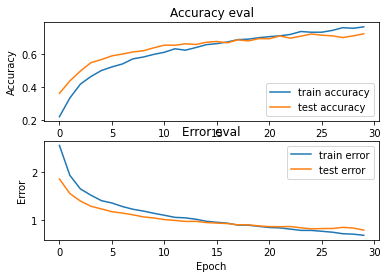

79/79 - 0s - loss: 0.8416 - accuracy: 0.7089

Test accuracy: 0.708850622177124
Target: 3, Predicted label: [3]


In [29]:
if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape)

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

    # pick a sample to predict from the test set
    X_to_predict = X_test[100]
    y_to_predict = y_test[100]

    # predict sample
    predict(model, X_to_predict, y_to_predict)

